<a href="https://colab.research.google.com/github/MillenRodrigues/Paradigmas-de-Programa-o---Atividade-T1/blob/main/PL_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Atividade T1 - Aprofundamento
Millen Tavares Rodrigues - Tia: 92300073
---





Para esta atividade eu escolhi o livro "O Poder do Agora" autor Eckhart Tolle, ganhei este livro da minha chefe e lembrei que preciso ler ele.

<img src="https://m.media-amazon.com/images/I/71ef0B1lsrL.jpg" width="250"/>




## Aquisição dos Dados

In [9]:
import urllib.request  # essa bibliotéca é para trazer texto da internet

# Estou criando uma variavel de texto vazia para adicionar o texto linha a linha
texto = []

def limpa_linha(linha):
    ''' Está função troca todas as letras por minuscula'''
    linha=linha.lower()# minusculo
    for limpeza in ['\n','.', ',','(',')','?','\'','!']:
        linha=linha.replace(limpeza,'')
    return linha   

# Para cada linha do texto, adicionar a linha na lista texto
for line in urllib.request.urlopen('https://archive.org/stream/OPoderDoAgoraEckhartTolle/O%20Poder%20Do%20Agora%20-%20Eckhart%20Tolle_djvu.txt'): 
    texto.append(limpa_linha(line.decode('utf-8')))




# Construção do Dicionário

In [10]:
mydict = {}                             # crie um dicionário vazio

for line in texto:

  line = line.lower()                   # converte para lower
  words = line.split()                  # separa cada palavra
#  print(words)

  for word in words:                      # para cada palavra em words
    if word not in mydict.keys():         # se palavra não está no dicionário 
      mydict[word] = 1                    # acrescenta a word com o valor 1
    else:                                 # se a entrada já existe 
      mydict[word] =  mydict[word] + 1    # apenas soma 1 ao valor já existente

print(mydict)    

{'<doctype': 1, 'html>': 1, '<html': 1, 'lang="en">': 1, '<--': 5, '__': 1, '_': 5, '__|': 1, '|_': 1, '___': 1, '_____': 1, '/': 6, '_`': 1, '|': 2, '_/': 1, '_|': 1, '\\|': 1, '|\\': 1, 'v': 1, '-_': 1, '\\___|_|': 1, '\\__|_||_|_|': 1, '\\_/\\___|': 1, '-->': 4, '<head': 1, 'data-release=1c0e1080': 1, 'data-node="www29usarchiveorg">': 1, '<title>full': 1, 'text': 3, 'of': 26, '&quot;o': 1, 'poder': 72, 'do': 940, 'agora': 216, 'eckhart': 10, 'tolle&quot;</title>': 1, '<meta': 6, 'name="viewport"': 1, 'content="width=device-width': 1, 'initial-scale=10"/>': 1, 'name="google-site-verification"': 2, 'content="q2ysouphkkghkfnp7fgakc4tmbs1gmag3ugnndb53b8"': 1, '/>': 4, 'content="bpjkvuvsx0lxfmjg19tlblckwkdpnptzeysbntapxuk"': 1, '<script': 9, '>': 19, '/*': 1, '@licstart': 1, 'the': 25, 'following': 1, 'is': 4, 'entire': 2, 'license': 6, 'notice': 2, 'for': 55, '*': 17, 'javascript': 2, 'code': 2, 'in': 9, 'this': 6, 'page': 6, 'program': 3, 'free': 3, 'software:': 1, 'you': 2, 'can': 2, 

# Exibição dos Resultados

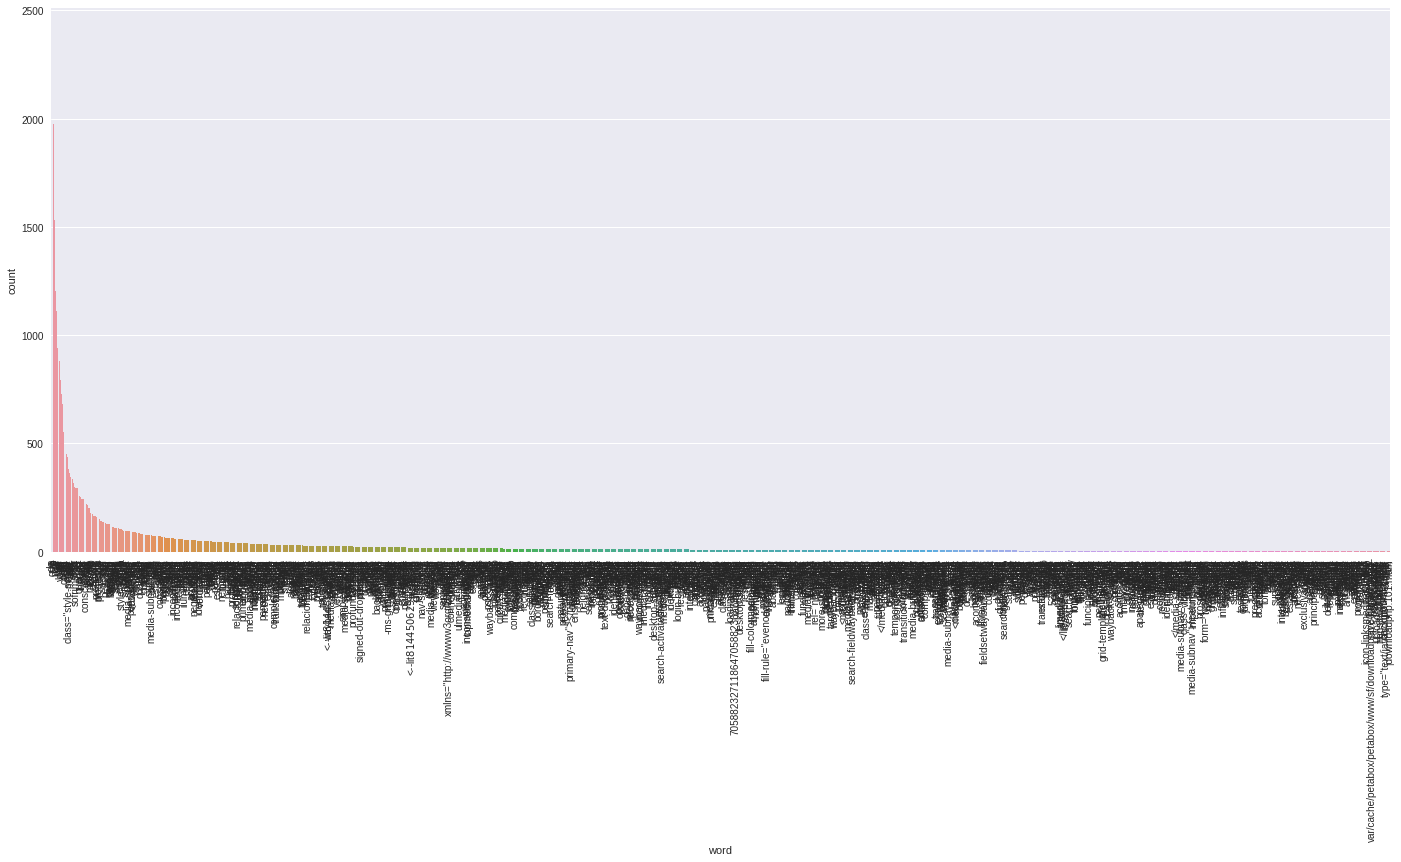

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.DataFrame(mydict.items(),  columns=['word', 'count']).sort_values('count',ascending=False)
df = df[df['count'] > 4] # somente termos com mais de 4 ocorrências
# df = df.iloc[ np.int(len(df)/2) - 10 : np.int(len(df)/2) + 10 ] # para livros ou textos com muitos termos limita a um número mínimo de termos

plt.figure(figsize=(24,10))
mpl.style.use(['seaborn'])
sns.barplot(x=df.word,y=df['count'])
plt.xticks(rotation=90) 

plt.show()